In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from datasets import load_dataset

linestyles = {'sampling': 'ks-', 'search': 'bo-', 'uniform':'rx-',
              'search_search': 'g.-', 'sampling_sampling':'c--', 'sampling_search':'o--',
              'reference': 'k--'}
# methods_all = ['uniform', 'sampling', 'search', 'sampling_sampling', 'search_search', 'sampling_search', 'reference']
methods_all = ['uniform', 'sampling', 'search', 'sampling_sampling', 'search_search']
get_idx = {method:i for i, method in enumerate(methods_all)}
colors = ['#CC79A7', '#0072B2', '#D55E00', '#009E73', '#E69F00', '#56B4E9', '#000000']
markers = ['v', 'o', 's', '^',  'D', '*', '']
linestyles = [':', '-', '--', '-.',  '-', '--', ':']
names = ["-".join(method.split("_")) for method in methods_all]

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],  # or "Computer Modern Roman"
    "axes.labelsize": 15,
    "font.size": 15,
    "legend.fontsize": 13,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
})

## Todo: clustering, compare to ground truth clustering's energy? visualize what points are picked? 1NN classifier resulting accuracy?
* try spectral embedding and then doing clustering energy with adaptive methods
* clean up/expand README.md (make clear for Ethan)
* perhaps start low-rank implementations
* work on getting paper edited with Rob, while Ethan is out til later. 

In [2]:
def is_mono(l):
    # assuming l is numpy array
    return (np.diff(l) <= 1e-8).all()

def plot_energies(filename, to_plot, datasetname, save=False, k=None, k_os=50, vmin=None, vmax=None):
    with open(filename, "rb") as f:
        data = pickle.load(f)
    datasetname = filename.split("_")[0].split("/")[-1]
    n = load_dataset(datasetname)[0].shape[1]
    
    p = filename.split("_p")[-1].split("_")[0]
    if p == "inf":
        p = r"\infty"
    else:
        p = int(p)
    
    if p == r"\infty":
        divisor = 1.0
    else:
        divisor = n**(1.0/float(p))
    
    if k is None:
        k = int(filename.split("_k")[-1].split("_")[0])
    kref = max(k_os, k)
    fig, ax = plt.subplots(figsize=(9,6), constrained_layout=True)
    mineval = 1e10
    if vmin and vmax:
        ax.set_ylim(vmin, vmax)

    for method in to_plot:
        try:
            dict = data[method]
        except:
            print(f"Something wrong with {method}...")
            continue 

        if len(method.split("_")) == 1:
            evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
            if evals.size < k_os:
                evals = evals[:k] # doesn't affect oversampling methods
            else:
                evals = evals[:min(k_os, evals.size)]
            
        else:
            # if swap move method
            evals = np.array(dict['energy'])
            if len(evals) == 0:
                continue
            evals = evals.mean(axis=0)
            evals = evals[:k]   # only do swaps on non-oversampling methods
        print(method, evals.size)
        if method =='sampling':
            s_val = evals[k-1]
        if method == 'search_search':
            ss_val = evals[k-1]
        mineval = min(evals.min(), mineval)
        plot = ax.semilogy(np.arange(1, evals.size+1), evals/divisor, color=colors[get_idx[method]], \
                            marker=markers[get_idx[method]], linestyle=linestyles[get_idx[method]], \
                            linewidth=2.0, label=names[get_idx[method]], markersize=8)
    ax.set_xscale('log')
    ax.set_autoscale_on(False)  # Disable autoscaling entirely
    ax.vlines(x=k, color='k', linestyles=':', ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1])
    plt.tick_params(axis='x', labelsize=22)
    plt.tick_params(axis='y', labelsize=22)
    if p == 2:
        ax.legend(loc='upper right', fontsize=18)
    else:
        if p != 1:
            ax.set_xlabel(r"Size $(k)$ of Prototype Set", fontsize=22)
            if p == 5:
                ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
        else:
            ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
    ax.text(x=0.06, y=0.1, s=fr"$p = {p}$", 
        ha='left', va='bottom', transform=ax.transAxes, 
        fontsize=22)
    print(s_val/ss_val)
    if save:
        plt.savefig(f"./figures/{filename.split('/')[-1].split('.pkl')[0]}.png", format="png", dpi=500, bbox_inches='tight')
    plt.show()


In [3]:

def plot_energies_all_legends(filename, to_plot, datasetname, save=False, k=None, k_os=50, vmin=None, vmax=None):
    with open(filename, "rb") as f:
        data = pickle.load(f)
    datasetname = filename.split("_")[0].split("/")[-1]
    n = load_dataset(datasetname)[0].shape[1]
    
    p = filename.split("_p")[-1].split("_")[0]
    if p == "inf":
        p = r"\infty"
    else:
        p = int(p)
    
    if p == r"\infty":
        divisor = 1.0
    else:
        divisor = n**(1.0/float(p))
    
    if k is None:
        k = int(filename.split("_k")[-1].split("_")[0])
    kref = max(k_os, k)
    fig, ax = plt.subplots(figsize=(9,6), constrained_layout=True)
    mineval = 1e10
    if vmin and vmax:
        ax.set_ylim(vmin, vmax)

    for method in to_plot:
        try:
            dict = data[method]
        except:
            print(f"Something wrong with {method}...")
            continue 

        if len(method.split("_")) == 1:
            evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
            if evals.size < k_os:
                evals = evals[:k] # doesn't affect oversampling methods
            else:
                evals = evals[:min(k_os, evals.size)]
            
        else:
            # if swap move method
            evals = np.array(dict['energy'])
            if len(evals) == 0:
                continue
            evals = evals.mean(axis=0)
            evals = evals[:k]   # only do swaps on non-oversampling methods
        print(method, evals.size)
        if method =='sampling':
            s_val = evals[k-1]
        if method == 'search_search':
            ss_val = evals[k-1]
        mineval = min(evals.min(), mineval)
        plot = ax.semilogy(np.arange(1, evals.size+1), evals/divisor, color=colors[get_idx[method]], \
                            marker=markers[get_idx[method]], linestyle=linestyles[get_idx[method]], \
                            linewidth=2.0, label=names[get_idx[method]], markersize=8)
    ax.set_xscale('log')
    ax.set_autoscale_on(False)  # Disable autoscaling entirely
    ax.vlines(x=k, color='k', linestyles=':', ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1])
    plt.tick_params(axis='x', labelsize=22)
    plt.tick_params(axis='y', labelsize=22)
    ax.legend(loc='upper right', fontsize=18)
    ax.set_xlabel(r"Size $(k)$ of Prototype Set", fontsize=22)
    ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
    ax.text(x=0.06, y=0.1, s=fr"$p = {p}$", 
        ha='left', va='bottom', transform=ax.transAxes, 
        fontsize=22)
    print(s_val/ss_val)
    if save:
        plt.savefig(f"./figures/{filename.split('/')[-1].split('.pkl')[0]}_full.png", format="png", dpi=500, bbox_inches='tight')
    plt.show()

(94249, 162)
(7500, 162)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6
2.0145482304761013


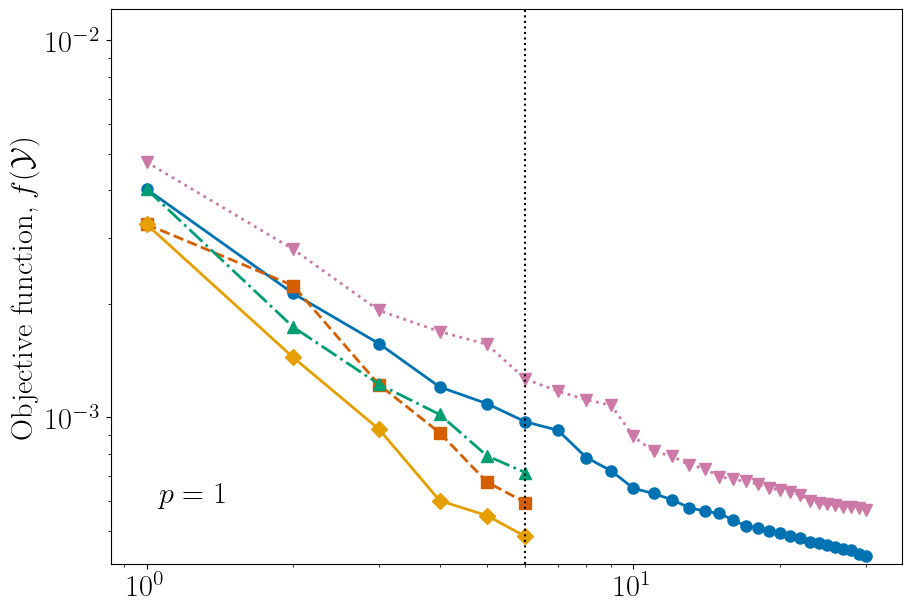

(94249, 162)
(7500, 162)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6
2.0145482304761013


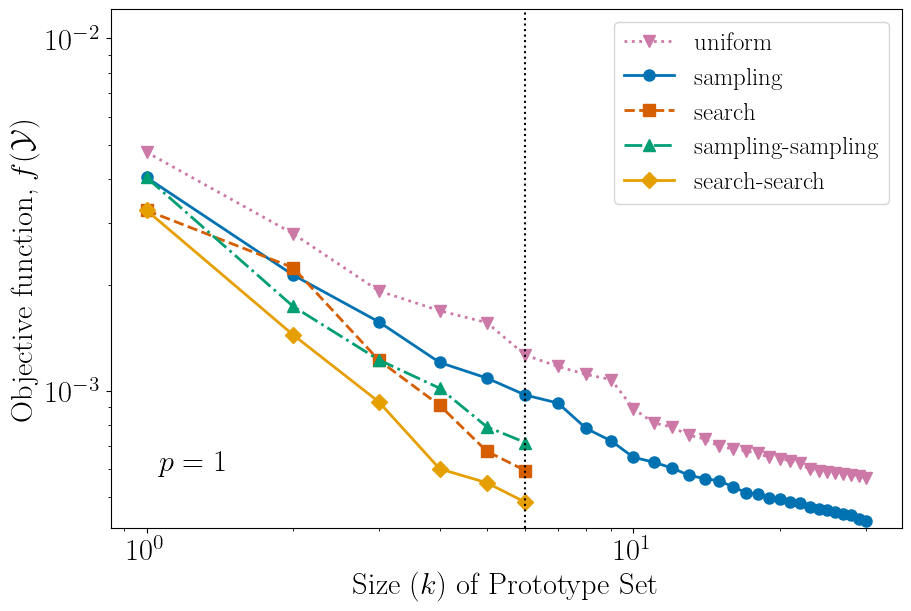

(94249, 162)
(7500, 162)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6
1.9185453945793778


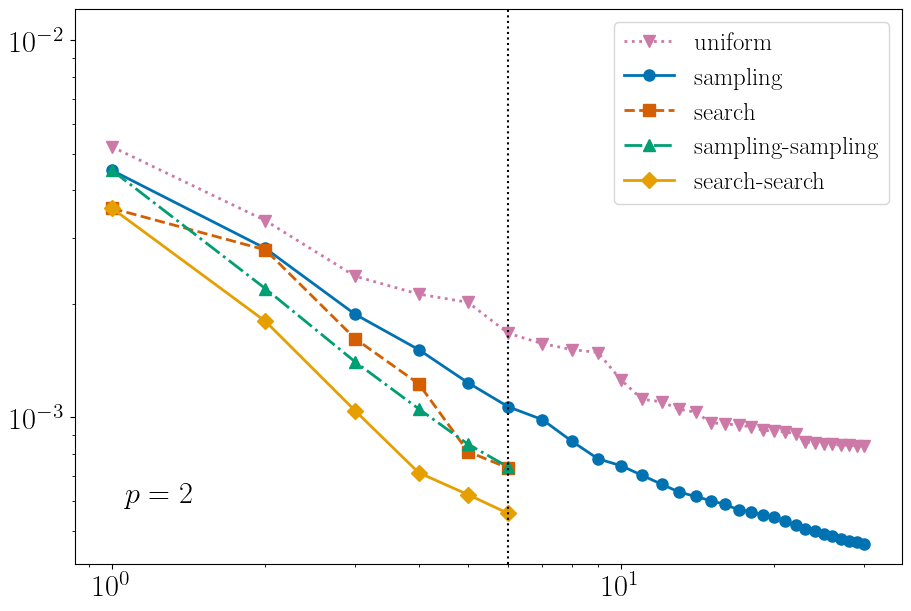

(94249, 162)
(7500, 162)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6
1.9185453945793778


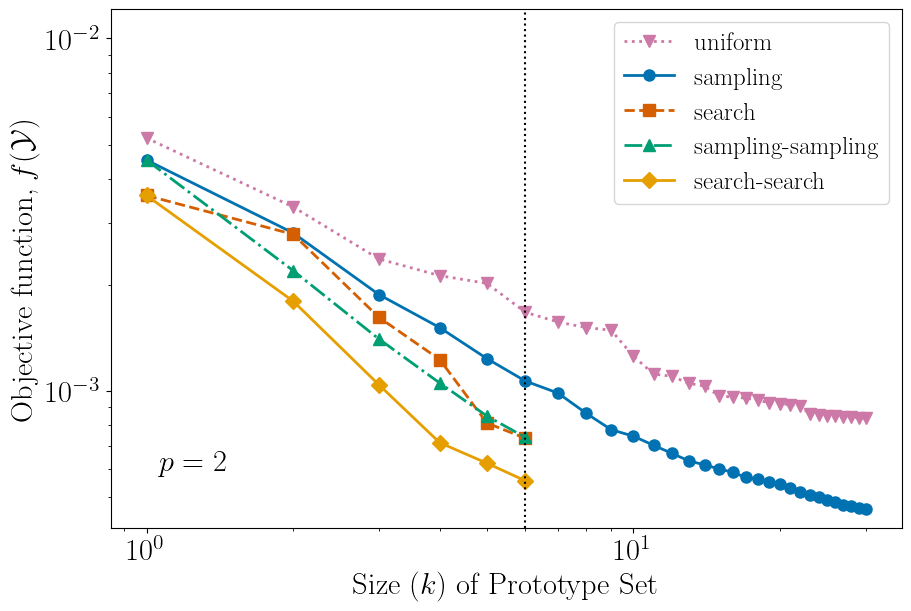

(94249, 162)
(7500, 162)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6
1.4654693929494147


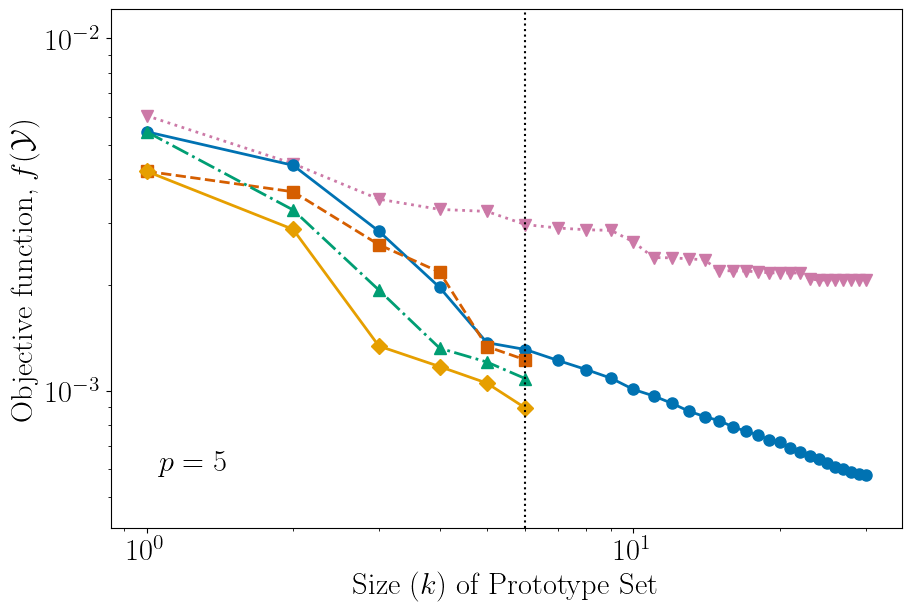

(94249, 162)
(7500, 162)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6
1.4654693929494147


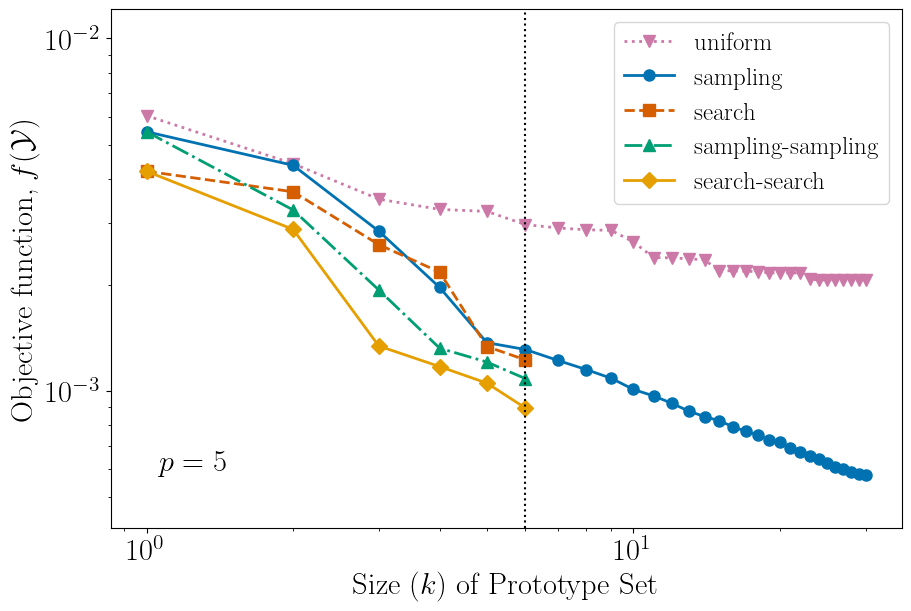

(94249, 162)
(7500, 162)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6
1.20999102359998


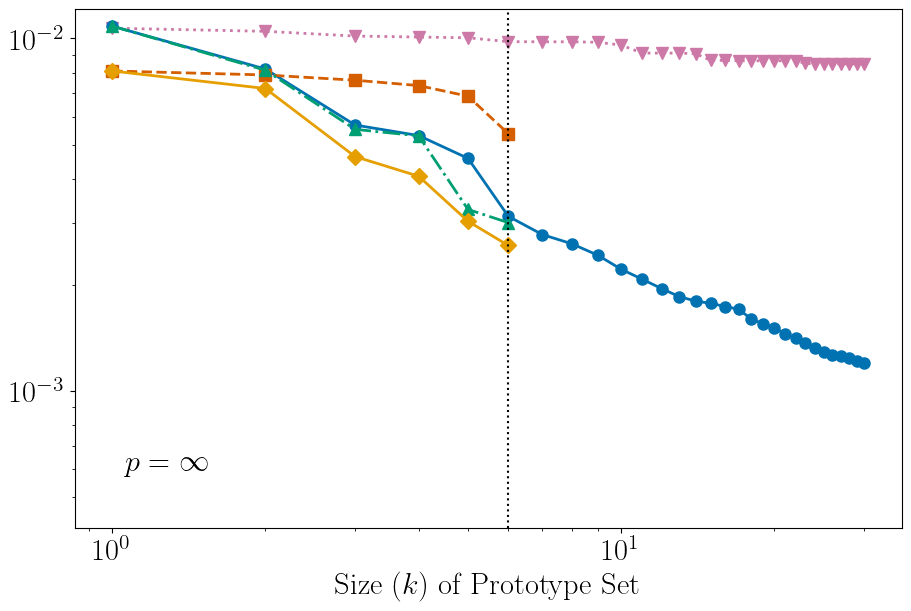

(94249, 162)
(7500, 162)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6
1.20999102359998


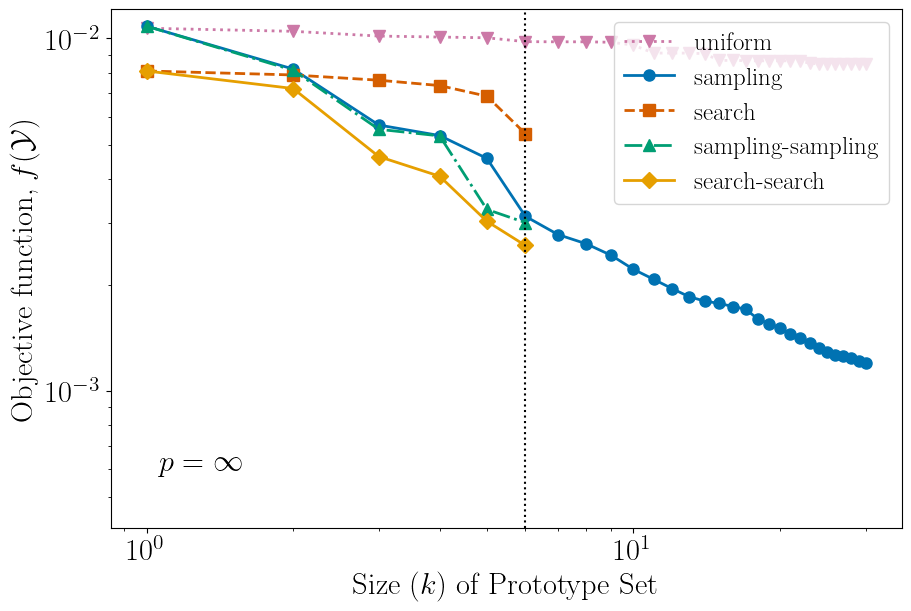

In [14]:
save = True
datasetname = "Urban"
dataset_lower = 'urbansub'
k = 6
for p in [1,2,5, 'inf']:
    filename = f"results/{dataset_lower}_conic_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)
    plot_energies(filename, methods_all, datasetname, save=save, k=k, k_os=30, 
                  vmin=0.00040779154247948248, vmax=0.012091402655757403)

    plot_energies_all_legends(filename, methods_all, datasetname, save=save, k=k, k_os=30, 
                  vmin=0.00040779154247948248, vmax=0.012091402655757403)


# Clustering Results

uniform 25
sampling 25
search 3
sampling_sampling 3
search_search 3
1.4627442110776054


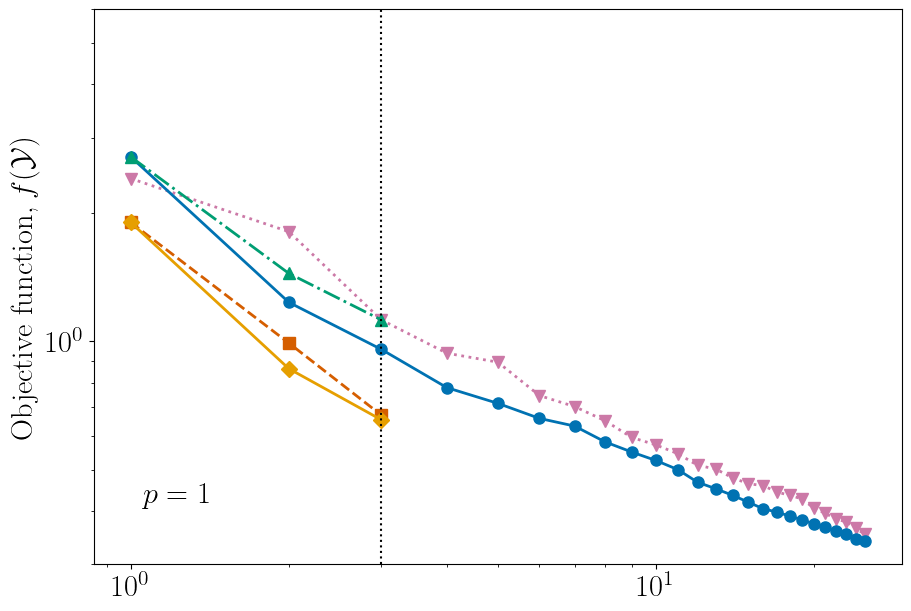

[np.float64(50.351305432009156), np.float64(51.75399921241373), np.float64(54.83858288737667), np.float64(49.3269816261686), np.float64(51.92038002576595), np.float64(47.24462929291846), np.float64(50.23263911655537), np.float64(48.8659561653586), np.float64(53.47291856449991), np.float64(50.88431142233374)]
10
uniform 25
sampling 25
search 3
sampling_sampling 3
search_search 3
1.3845341288657824


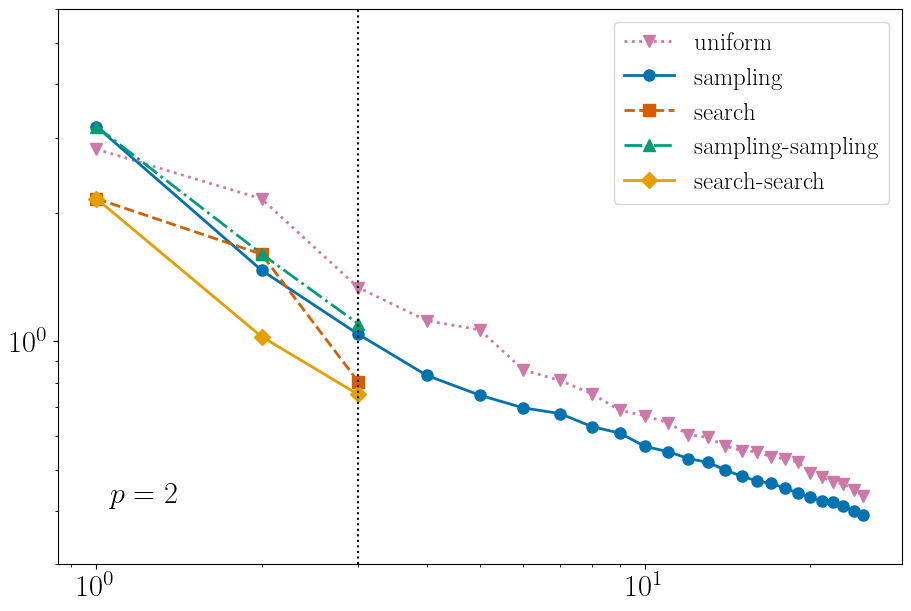

[np.float64(4.911211663123468), np.float64(4.817675788178388), np.float64(4.883646178829913), np.float64(4.9213819197457225), np.float64(4.751841748206671), np.float64(4.373785545725819), np.float64(4.803123983409149), np.float64(4.692547282660054), np.float64(5.081338406365043), np.float64(4.5694638635183376)]
10
uniform 25
sampling 25
search 3
sampling_sampling 3
search_search 3
1.274842565876621


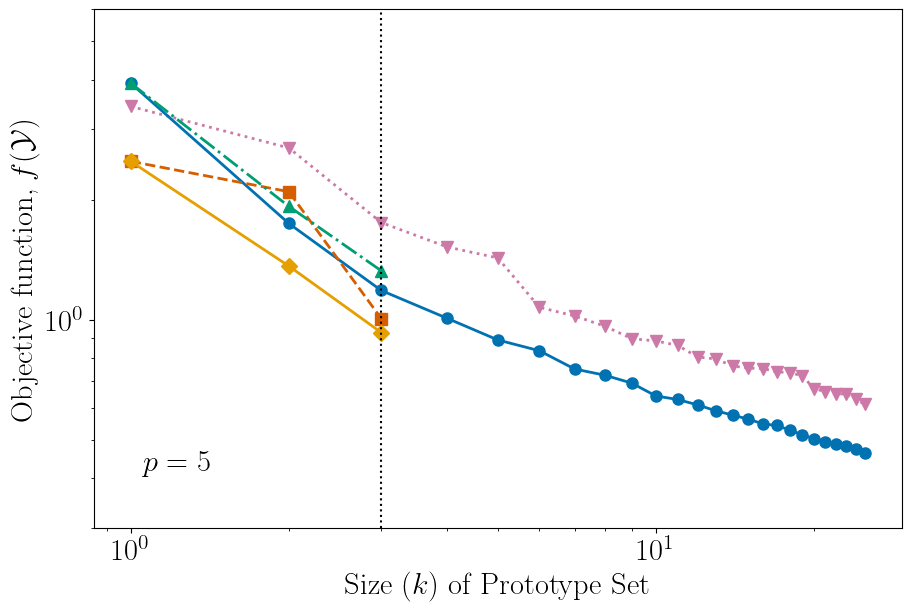

[np.float64(1.1443486532894953), np.float64(1.3652803078826097), np.float64(1.2061165176741453), np.float64(1.3103825064334034), np.float64(1.2848031981813608), np.float64(1.2644625613636724), np.float64(1.1948507619718642), np.float64(1.2071164075474394), np.float64(1.3195725091744044), np.float64(1.2987358244831777)]
10
uniform 25
sampling 25
search 3
sampling_sampling 3
search_search 3
1.4700697755435042


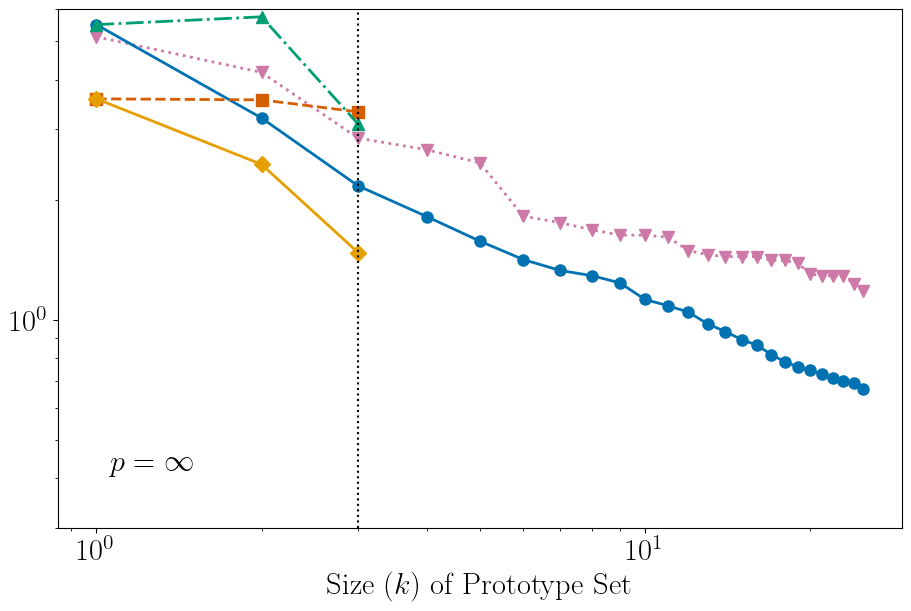

[np.float64(0.6557438524302053), np.float64(0.6557438524302053), np.float64(0.7141428428542985), np.float64(0.6855654600401062), np.float64(0.6480740698407764), np.float64(0.6855654600401243), np.float64(0.6480740698407929), np.float64(0.6557438524302053), np.float64(0.6557438524302053), np.float64(0.6855654600401088)]
10


In [9]:
save = False
datasetname = "Iris"
dataset_lower = 'iris'
energy = 'cluster-dense'
k = 10
for p in [1,2,5, 'inf']:
    filename = f"results/{dataset_lower}_{energy}_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)

    plot_energies(filename, methods_all, datasetname, save=save, k=3, k_os=25, vmin=0.3, vmax=6)
    print(data['sampling']['energy'])
    print(len(data['sampling_sampling']['energy'][0]))

uniform 25
sampling 25
search 3
sampling_sampling 3
search_search 3
1.4627442110776054


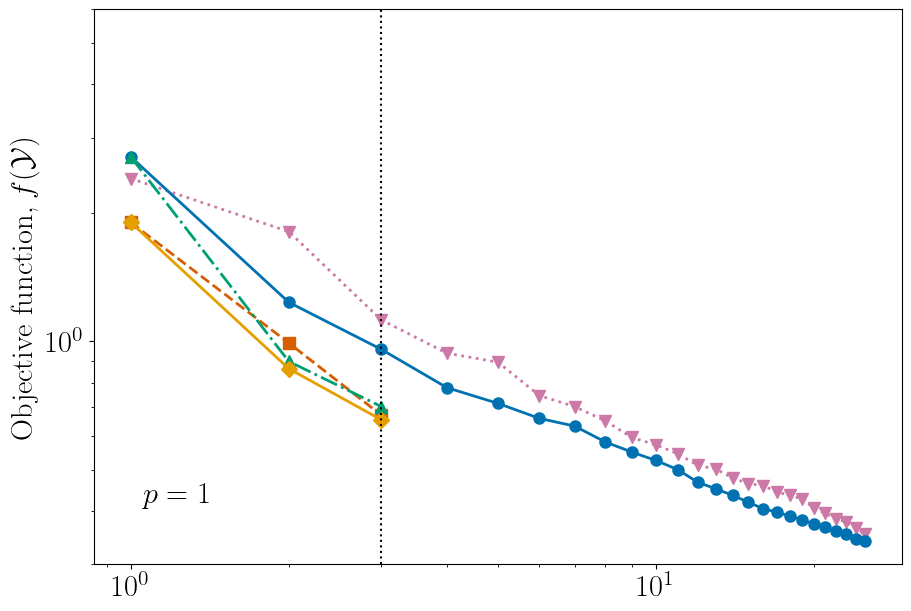

[np.float64(50.351305432009156), np.float64(51.75399921241373), np.float64(54.83858288737667), np.float64(49.3269816261686), np.float64(51.92038002576595), np.float64(47.24462929291846), np.float64(50.23263911655537), np.float64(48.8659561653586), np.float64(53.47291856449991), np.float64(50.88431142233374)]
10
uniform 25
sampling 25
search 3
sampling_sampling 3
search_search 3
1.3845341288657824


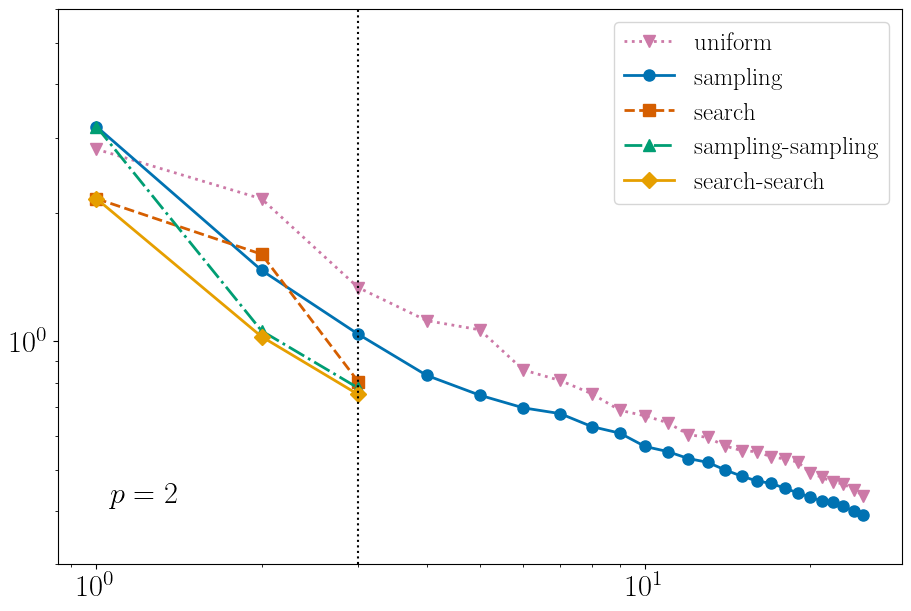

[np.float64(4.911211663123468), np.float64(4.817675788178388), np.float64(4.883646178829913), np.float64(4.9213819197457225), np.float64(4.751841748206671), np.float64(4.373785545725819), np.float64(4.803123983409149), np.float64(4.692547282660054), np.float64(5.081338406365043), np.float64(4.5694638635183376)]
10
uniform 25
sampling 25
search 3
sampling_sampling 3
search_search 3
1.274842565876621


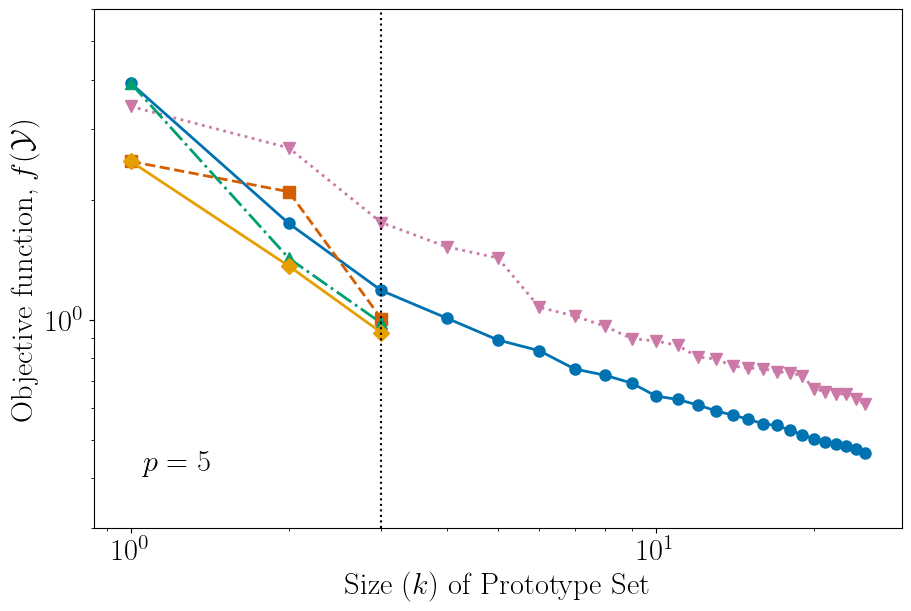

[np.float64(1.1443486532894953), np.float64(1.3652803078826097), np.float64(1.2061165176741453), np.float64(1.3103825064334034), np.float64(1.2848031981813608), np.float64(1.2644625613636724), np.float64(1.1948507619718642), np.float64(1.2071164075474394), np.float64(1.3195725091744044), np.float64(1.2987358244831777)]
10
uniform 25
sampling 25
search 3
sampling_sampling 3
search_search 3
1.4700697755435042


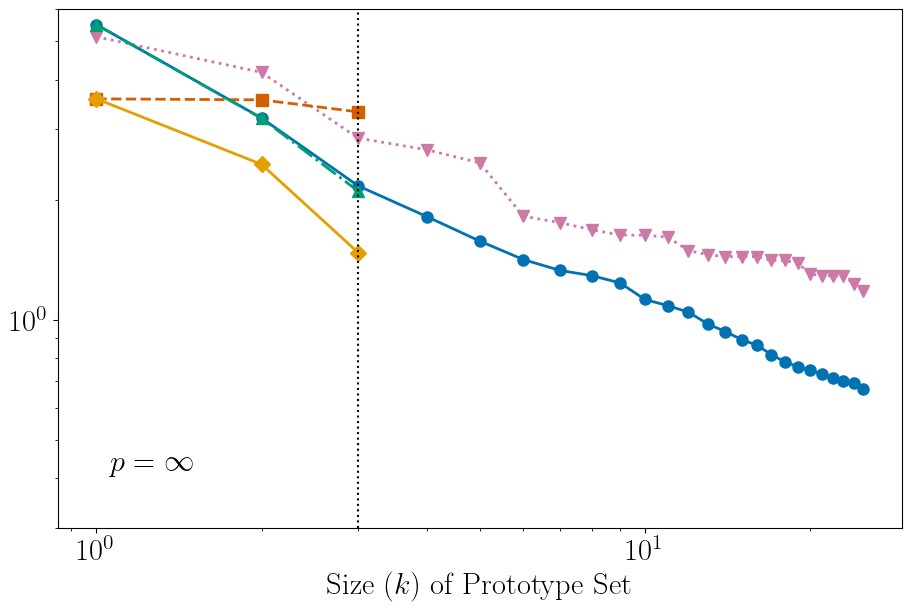

[np.float64(0.6557438524302053), np.float64(0.6557438524302053), np.float64(0.7141428428542985), np.float64(0.6855654600401062), np.float64(0.6480740698407764), np.float64(0.6855654600401243), np.float64(0.6480740698407929), np.float64(0.6557438524302053), np.float64(0.6557438524302053), np.float64(0.6855654600401088)]
10


In [11]:
save = False
datasetname = "Iris"
dataset_lower = 'iris'
energy = 'cluster-dense'
k = 10
for p in [1,2,5, 'inf']:
    filename = f"results-sampling-swap-old/{dataset_lower}_{energy}_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)

    plot_energies(filename, methods_all, datasetname, save=save, k=3, k_os=25, vmin=0.3, vmax=6)
    print(data['sampling']['energy'])
    print(len(data['sampling_sampling']['energy'][0]))

uniform 25
sampling 25
search 20
sampling_sampling 20
search_search 20
1.156357


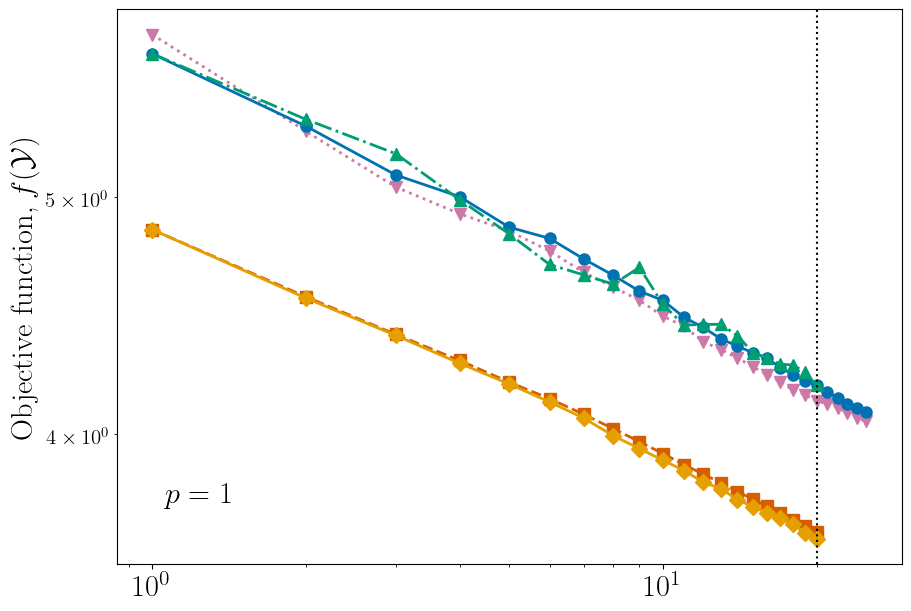

uniform 25
sampling 25
search 20
sampling_sampling 20
search_search 20
1.1458286


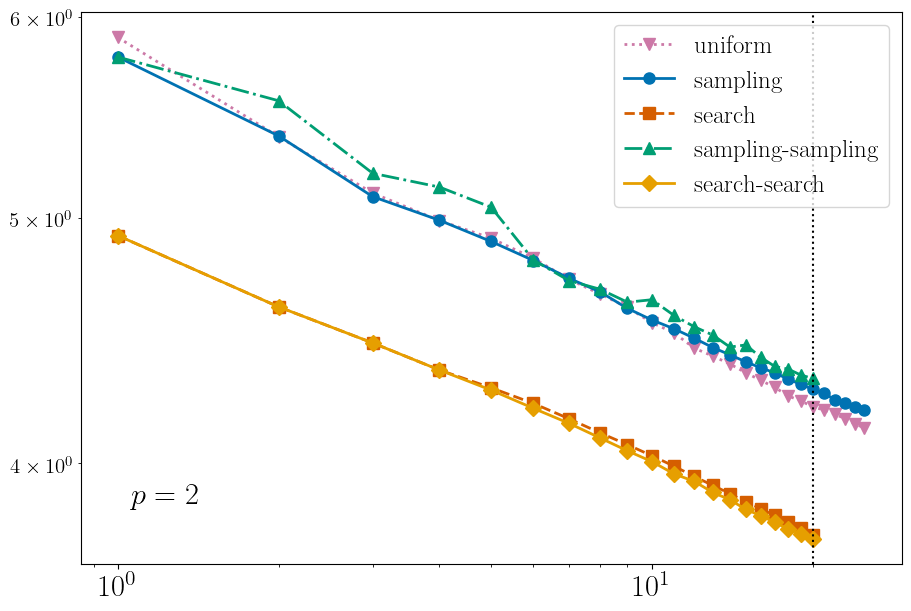

uniform 25
sampling 25
search 20
sampling_sampling 20
search_search 20
1.1264302


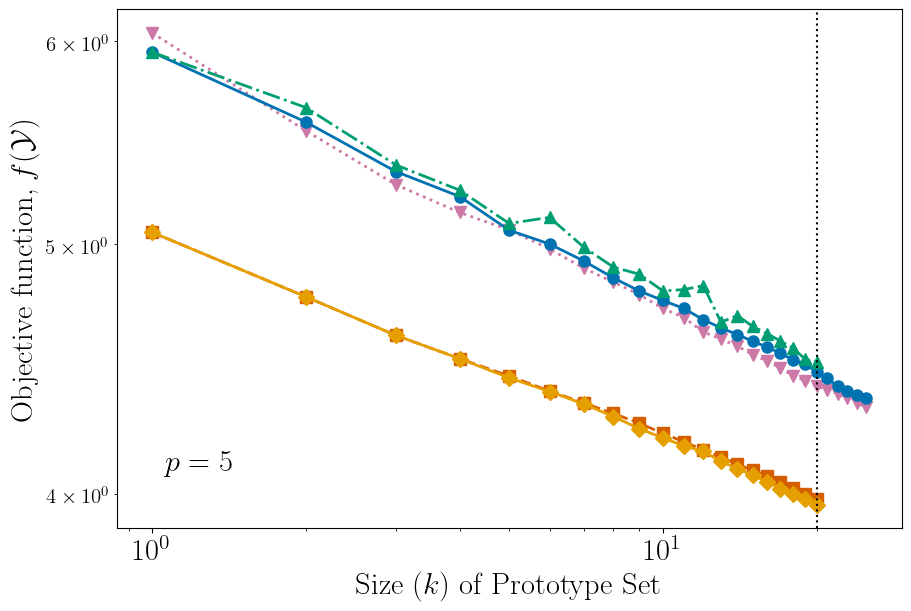

uniform 25
sampling 25
search 20
sampling_sampling 20
search_search 20
1.1513782


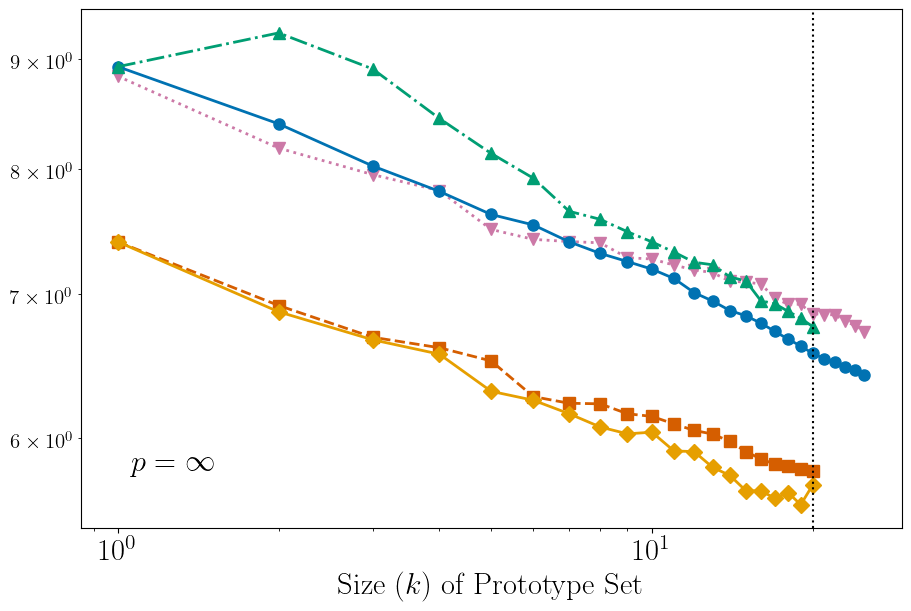

In [18]:
save = False
datasetname = "MNIST"
dataset_lower = 'mnist'
k = 20
for p in [1,2,5, 'inf']:
    filename = f"results/{dataset_lower}_cluster-dense_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)
    
    plot_energies(filename, methods_all, datasetname, save=save, k=k, k_os=25) 
                #   vmin=0.00040779154247948248, vmax=0.012091402655757403)

In [4]:
with open("./results/urbansub_conic_k6_p2_ns10.pkl", "rb") as f:
    data = pickle.load(f)
print(data.keys())

dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search'])


In [5]:
dataset = 'urbansub'
with open (f"./results/{dataset}_conic_k6_p1_ns10.pkl", "rb") as f:
    data = pickle.load(f)
print(data.keys())

X, labels = load_dataset(dataset)
n = X.shape[1]
print(n)

dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search'])
(94249, 162)
(7500, 162)
7500


In [6]:
key = 'search_search'
print(key)
print(len(data[key]['energy_values'])) # first dim is number of trials (# of seeds)

if len(key.split("_")) > 1:
    print("swaps method")
    print([len(x) for x in data[key]['energy_values']]) # second dim is number of subset sizes we did
    print([len(x) for x in data[key]['energy_values'][0]]) # third dim is number of swaps in the trial
else:
    print("non-swaps method")
    print([len(x) for x in data[key]['energy_values']]) # second dim is the number of points we chose via this adaptive method

search_search
1
swaps method
[6]
[1, 26, 30, 27, 42, 43]


In [7]:
dataset = 'urbansub'
for p in [1,2,5,'inf']:
    with open (f"./results/{dataset}_conic_k6_p{p}_ns10.pkl", "rb") as f:
        data = pickle.load(f)
    print(p, data['search_search']['num_cycles'], [len(x) for x in data['search_search']['energy_values'][0]])

1 [[1, 1, 3, 2, 2, 1]] [1, 26, 30, 27, 42, 43]
2 [[1, 1, 1, 2, 3, 2]] [1, 16, 22, 33, 36, 48]
5 [[1, 1, 1, 3, 2, 2]] [1, 19, 25, 33, 52, 58]
inf [[1, 1, 1, 2, 4, 4]] [1, 24, 59, 112, 165, 189]


In [8]:
key = "search_search"
evals_ = [data[key]['energy_values'][i][5] for i in range(len(data[key]['energy_values']))]
maxlen = max([len(x) for x in evals_])
print([len(x) for x in evals_])
evals_ = np.array([np.pad(x, (0, maxlen - len(x)), 'constant', constant_values=np.nan) for x in evals_])
print(evals_.shape)


[189]
(1, 189)


In [42]:
dataset = 'urbansub' 
k = 6 
p = 1

with open (f"./results/{dataset}_conic_k{k}_p{p}_ns10.pkl", "rb") as f:
    data = pickle.load(f)
print(data.keys())

thing = data['sampling_sampling']['energy_values']
for x in thing:
    print(len(x[-1]))  # number of swaps

dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search'])
37
37
37
37
37
37
37
37
37
37


In [10]:
%load_ext autoreload

In [17]:
%autoreload 2

In [22]:
import importlib

In [25]:
import energies 
import sampling

In [32]:
importlib.reload(sampling)
importlib.reload(energies)

<module 'energies' from '/home/ksmiller/Documents/research/adaptive-sampling/energies.py'>

In [33]:
X, labels = load_dataset(dataset)
energy = energies.ConicHullEnergy(X=X, p=1, n_jobs=15)
sampler = sampling.AdaptiveSampler(energy, report_timing=True)


(94249, 162)
(7500, 162)


In [34]:
sampler.build_phase(6, method='sampling')

In [35]:
print(sampler.Energy.energy_values)

[np.float64(31.09423865468789), np.float64(11.969782784063618), np.float64(9.766296568001302), np.float64(9.160604888065542), np.float64(7.618816948380852), np.float64(7.331573483137298)]


In [36]:
_ = sampler.swap_phase(method="sampling", max_swaps=36, debug=True)

swap at iter  0  index  0
	len of sampler.Energy.energy_values =  7
swap at iter  1  index  1
	len of sampler.Energy.energy_values =  8
swap at iter  2  index  2
	len of sampler.Energy.energy_values =  9
swap at iter  3  index  3
	len of sampler.Energy.energy_values =  10
swap at iter  4  index  4
	len of sampler.Energy.energy_values =  11
swap at iter  5  index  5
	len of sampler.Energy.energy_values =  12
swap at iter  6  index  0
	len of sampler.Energy.energy_values =  13
swap at iter  7  index  1
	len of sampler.Energy.energy_values =  14
swap at iter  8  index  2
	len of sampler.Energy.energy_values =  15
swap at iter  9  index  3
	len of sampler.Energy.energy_values =  16
swap at iter  10  index  4
	len of sampler.Energy.energy_values =  17
swap at iter  11  index  5
	len of sampler.Energy.energy_values =  18
swap at iter  12  index  0
	len of sampler.Energy.energy_values =  19
swap at iter  13  index  1
	len of sampler.Energy.energy_values =  20
swap at iter  14  index  2
	len o

In [38]:
len(sampler.Energy.energy_values)

43

In [31]:
sampler.Energy.energy_values

[np.float64(43.03686065350835),
 np.float64(33.78200778607347),
 np.float64(25.853409523754685),
 np.float64(16.788550118367695),
 np.float64(9.65167343008693),
 np.float64(5.318503113132373)]

dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search'])
(94249, 162)
(7500, 162)
search (1, 6) (6,)
	 [6]
sampling (10, 30) (30,)
	 [30 30 30 30 30 30 30 30 30 30]
search_search (1, 43) (43,)
	 [43]
	 (10, 37) (10, 6)
sampling_sampling (10, 43) (43,)
	 [43 43 43 43 43 43 43 43 43 43]


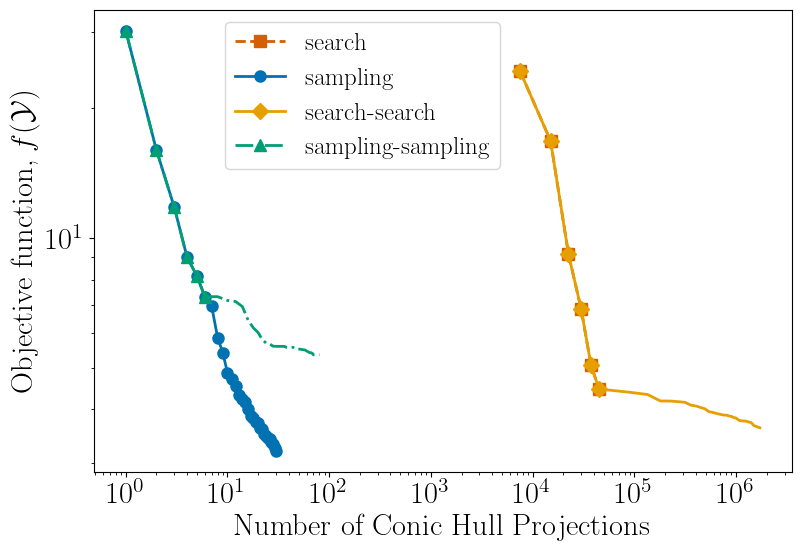

In [60]:
save = True
k = 6
dataset = 'urbansub'

for p in [1]:

    with open (f"./results/{dataset}_conic_k{k}_p{p}_ns10.pkl", "rb") as f:
        data = pickle.load(f)
    print(data.keys())

    X, labels = load_dataset(dataset)
    n = X.shape[1]
    

    fig, ax = plt.subplots(figsize=(9,6))
    
    for method, dict in data.items():
        if method in ["sampling_search", "uniform"]:
            continue
        if len(method.split("_")) > 1:
            # if swap move method 
            build_method, swap_method = method.split("_")
            evals = [dict['energy_values'][i][k-1] for i in range(len(dict['energy_values']))]
            maxlen = max([len(x) for x in evals])
            evals = np.array([np.pad(x, (0, maxlen - len(x)), 'constant', constant_values=np.nan) for x in evals])
            if build_method == 'sampling':
                x = np.arange(1, k+1)
            elif build_method == 'search':
                x = np.cumsum(np.array([n-i for i in range(k)]))
            else:
                raise ValueError(f"Something wrong with method {method}...")
            
            if swap_method == 'sampling':
                # with each swap move, we do 2 calls to the projection onto the conic hull
                x = np.concatenate((x, k+np.cumsum(evals.shape[1]*[2])))
                sampling_evals = np.array([x[:k] for x in data['sampling']['energy_values']])
                print("\t", evals.shape, sampling_evals.shape)
                evals = np.concatenate((sampling_evals, evals), axis=1)
            elif swap_method == 'search':
                # with each swap move, we do k(n-k+1) calls to the projection onto the conic hull
                x = np.concatenate((x, x[-1] + np.cumsum((evals.shape[1]-k)*[k*(n-k+1)])))
            else:
                raise ValueError(f"Something wrong with method {method}...")

        else:
            evals = np.array([x for x in dict['energy_values']])
            if method == 'sampling':
                x = np.arange(1, evals.shape[-1]+1) 
            elif method == 'search':
                x = np.cumsum(np.array([n-i for i in range(k)]))
            else:
                continue 
        
        print(method, evals.shape, x.shape)
        print("\t", (evals > 0).sum(axis=1))
        evals_mean = np.nanmean(evals, axis=0)   
        evals_std = np.nanstd(evals, axis=0)

        if len(method.split("_")) > 1:
            ax.plot(x[:k], evals_mean[:k], color=colors[get_idx[method]],
                    marker=markers[get_idx[method]], linestyle=linestyles[get_idx[method]],
                    linewidth=2.0, label=names[get_idx[method]], markersize=8, zorder=20-get_idx[method])
            ax.plot(x[k-1:], evals_mean[k-1:], color=colors[get_idx[method]],
                    marker=None, linestyle=linestyles[get_idx[method]],
                    linewidth=2.0,  markersize=8, zorder=20-get_idx[method])
        else:
            ax.plot(x, evals_mean, color=colors[get_idx[method]],
                    marker=markers[get_idx[method]], linestyle=linestyles[get_idx[method]],
                    linewidth=2.0, label=names[get_idx[method]], markersize=8, zorder=10-get_idx[method])
    # ax.set_xlim(2e-2, 1e7)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_autoscale_on(False)
    ax.legend(loc='upper right', fontsize=18, bbox_to_anchor=(.6, 1.0))
    ax.set_xlabel(r"Number of Conic Hull Projections", fontsize=22)
    ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=22)
    if save:
        plt.savefig(f"./figures/{dataset}_k{k}_p{p}_numprojs.png", format="png", dpi=500, bbox_inches='tight')
    plt.show()

In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
dataset = "urbansub"

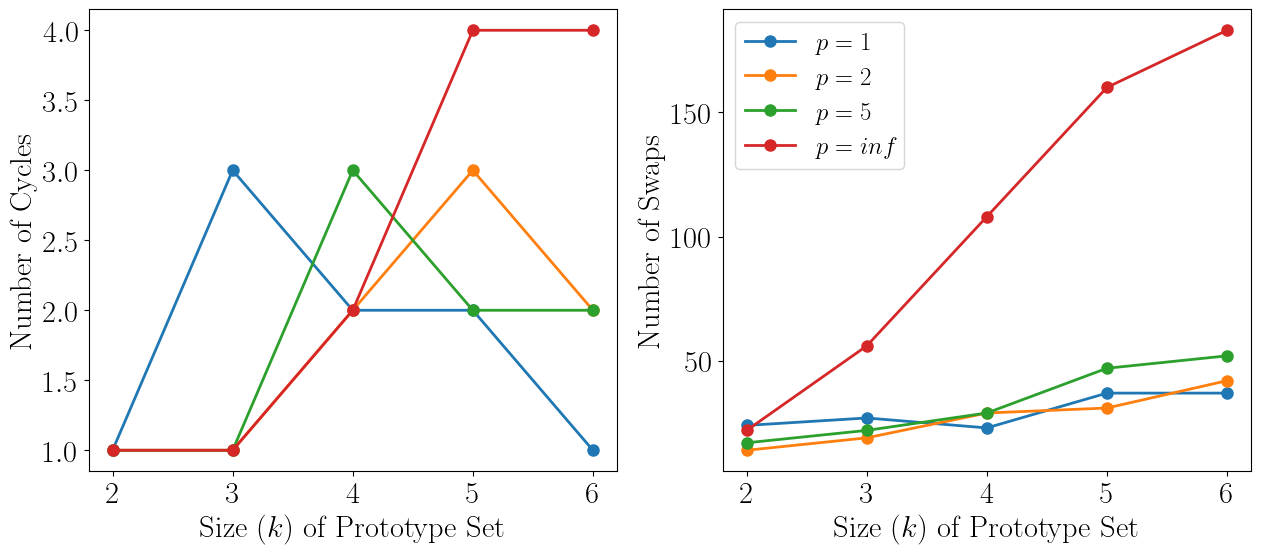

In [24]:
# num of cycles in adaptive search swap 
save = False 
k = 6
kdom = np.arange(2, k+1)
fig, axs = plt.subplots(1, 2, figsize=(15,6))
for p in [1, 2, 5, 'inf']:
    try:
        with open(f"./results/{dataset}_conic_k{k}_p{p}_ns10.pkl", "rb") as f:
            data = pickle.load(f)
        evals = data['search_search']['energy_values']
        num_swaps = np.array([len(x) - (k_+ 1) for k_, x in enumerate(evals[0])])[1:] # ignore the first because no swaps done
        num_cycles = data['search_search']['num_cycles'][0][1:]
    
    except:
        print("something wrong with p=", p) 
        continue

    axs[0].plot(kdom, num_cycles, label=fr"$p={p}$", marker='o', linestyle='-', linewidth=2.0, markersize=8)
    axs[1].plot(kdom, num_swaps, label=fr"$p={p}$", marker='o', linestyle='-', linewidth=2.0, markersize=8)
axs[0].set_xticks(kdom)
axs[0].tick_params(axis='x', labelsize=22)
axs[0].tick_params(axis='y', labelsize=22)
axs[0].set_xlabel(r"Size $(k)$ of Prototype Set", fontsize=22)
axs[0].set_ylabel(r"Number of Cycles", fontsize=22)
axs[1].set_xticks(kdom)
axs[1].tick_params(axis='x', labelsize=22)
axs[1].tick_params(axis='y', labelsize=22)
axs[1].set_xlabel(r"Size $(k)$ of Prototype Set", fontsize=22)
axs[1].set_ylabel(r"Number of Swaps", fontsize=22)
#ax.plot(kdom, kdom, 'k--', label=r"$k$", linewidth=2.0, alpha=0.6)
#ax.plot(kdom, kdom*np.log(kdom), 'k:', label=r"$k\log k$", linewidth=2.0, alpha=0.6)
axs[1].legend(fontsize=18)
plt.show()

dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference'])
dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference'])
dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference'])
dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference'])


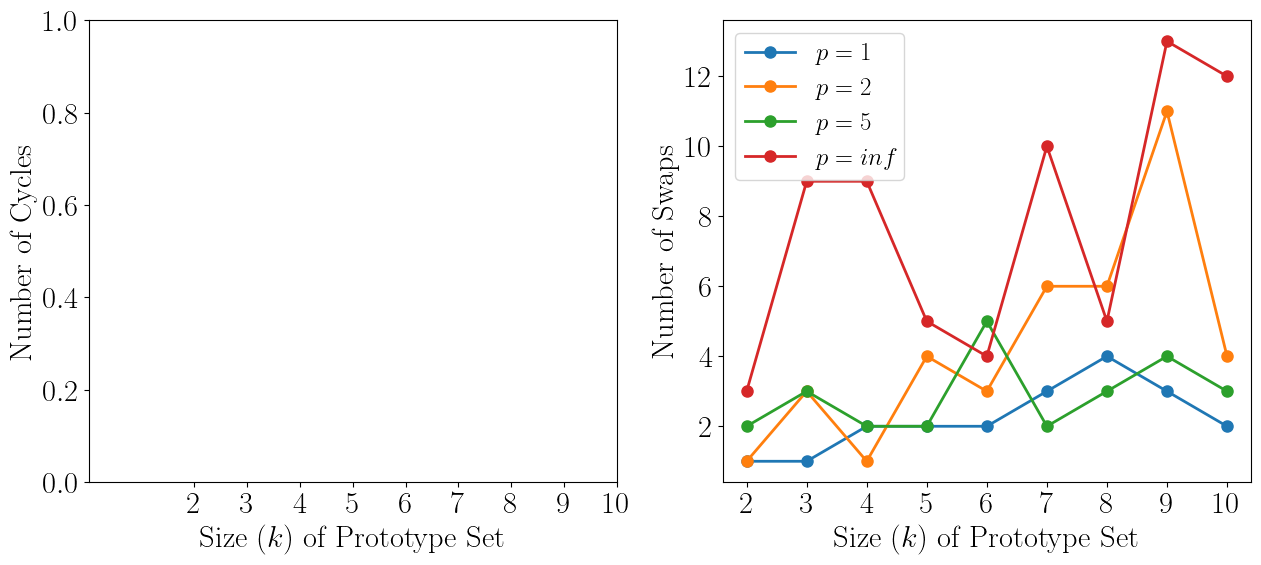

In [27]:
# num of cycles in adaptive search swap 
save = False 
k = 10
kdom = np.arange(2, k+1)
dataset = 'iris'
fig, axs = plt.subplots(1, 2, figsize=(15,6))
for p in [1, 2, 5, 'inf']:
    try:
        with open(f"./results/{dataset}_cluster-dense_k{k}_p{p}_ns10.pkl", "rb") as f:
            data = pickle.load(f)
            print(data.keys())
        evals = data['search_search']['energy_values']
        num_swaps = np.array([len(x) - (k_+ 1) for k_, x in enumerate(evals[0])])[1:] # ignore the first because no swaps done
        #num_cycles = data['search_search']['num_cycles'][0][1:]
    
    except:
        print("something wrong with p=", p) 
        continue

    #axs[0].plot(kdom, num_cycles, label=fr"$p={p}$", marker='o', linestyle='-', linewidth=2.0, markersize=8)
    axs[1].plot(kdom, num_swaps, label=fr"$p={p}$", marker='o', linestyle='-', linewidth=2.0, markersize=8)
axs[0].set_xticks(kdom)
axs[0].tick_params(axis='x', labelsize=22)
axs[0].tick_params(axis='y', labelsize=22)
axs[0].set_xlabel(r"Size $(k)$ of Prototype Set", fontsize=22)
axs[0].set_ylabel(r"Number of Cycles", fontsize=22)
axs[1].set_xticks(kdom)
axs[1].tick_params(axis='x', labelsize=22)
axs[1].tick_params(axis='y', labelsize=22)
axs[1].set_xlabel(r"Size $(k)$ of Prototype Set", fontsize=22)
axs[1].set_ylabel(r"Number of Swaps", fontsize=22)
#ax.plot(kdom, kdom, 'k--', label=r"$k$", linewidth=2.0, alpha=0.6)
#ax.plot(kdom, kdom*np.log(kdom), 'k:', label=r"$k\log k$", linewidth=2.0, alpha=0.6)
axs[1].legend(fontsize=18)
plt.show()

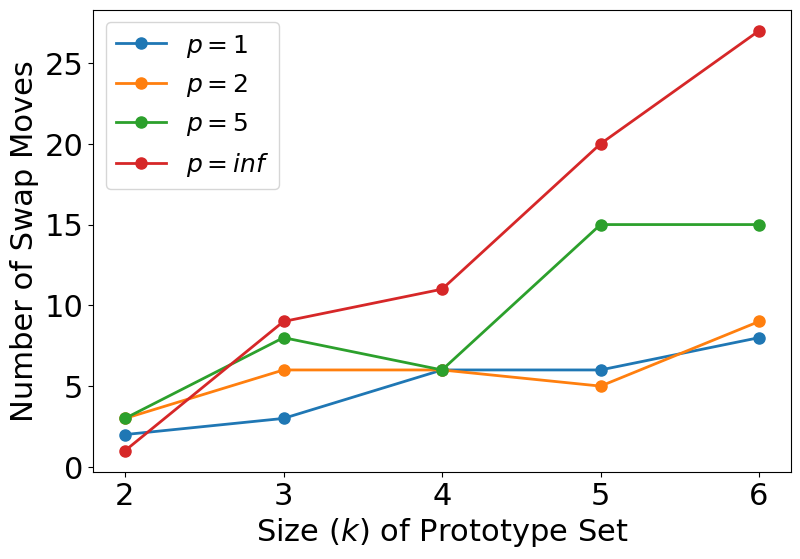

In [5]:
# num of swap moves 
save = True 
k = 6
kdom = np.arange(2, k+1)
fig, ax = plt.subplots(figsize=(9,6))
for p in [1, 2, 5, 'inf']:
    try:
        with open(f"./results/{dataset}_conic_k{k}_p{p}_ns10.pkl", "rb") as f:
            data = pickle.load(f)
        evals = data['search_search']['energy_values']
        num_swaps = np.array([len(x) - (k_+ 1) for k_, x in enumerate(evals[0])])[1:] # ignore the first because no swaps done
        
    
    except:
        print("something wrong with p=", p) 
        continue

    ax.plot(kdom, num_swaps, label=fr"$p={p}$", marker='o', linestyle='-', linewidth=2.0, markersize=8)
ax.set_xticks(kdom)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)
ax.set_xlabel(r"Size $(k)$ of Prototype Set", fontsize=22)
ax.set_ylabel(r"Number of Swap Moves", fontsize=22)

#ax.plot(kdom, kdom, 'k--', label=r"$k$", linewidth=2.0, alpha=0.6)
#ax.plot(kdom, kdom*np.log(kdom), 'k:', label=r"$k\log k$", linewidth=2.0, alpha=0.6)
ax.legend(fontsize=18)
plt.show()
    

color code urban images with predictions/projections onto prototypes. labeled vs unlabeled.
- fix y axis to be constant for all in blocks of figures 
- check search swaps implementation-- it is an iteration through each of the k points. See where I got the previous idea from...?


## Urban prototype plots

In [1]:
from datasets import load_dataset
import numpy as np 
import matplotlib.pyplot as plt
import pickle

X, labels = load_dataset('urban')
rstate = np.random.RandomState(42)
subset = rstate.choice(X.shape[1], 7500, replace=False)

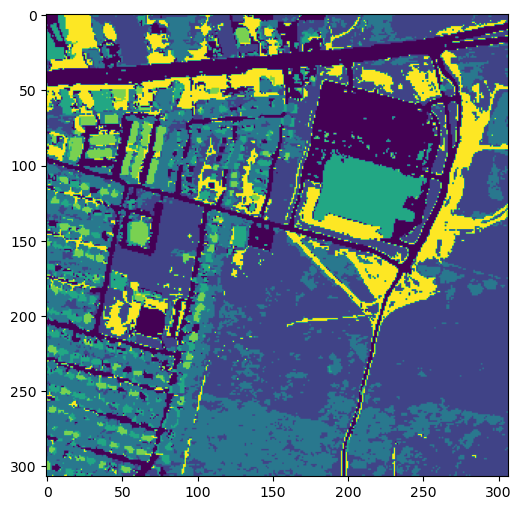

In [2]:
X = X.T
Xs = X[subset]
labels_s = labels[subset]

img = labels.reshape(307, 307).T
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img)
plt.show()

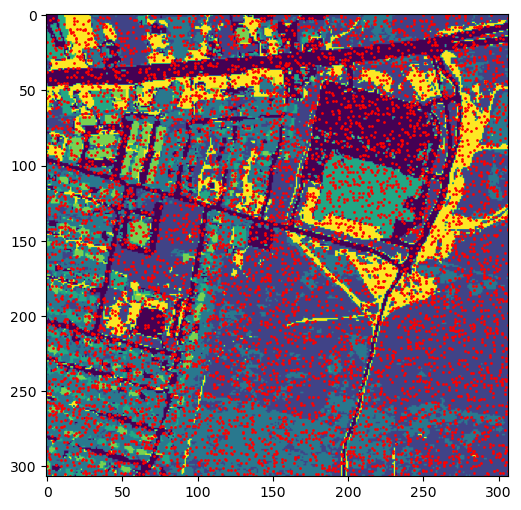

In [3]:
img_indices = np.arange(labels.size)
img = labels.reshape(307, 307).T

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img)
ax.scatter(subset % 307, subset // 307, c='r', s=1)
plt.show()

In [4]:
from energies import ConicHullEnergy
from tqdm import tqdm 
import os

In [113]:
k = 6
resultsdir = "./preds/"
if not os.path.exists(resultsdir):
    os.makedirs(resultsdir)

methods_to_show = ['search_search', 'sampling_sampling', 'search', 'sampling']
for p in [1,2,5,'inf']:
    with open(f"./results/urbansub_conic_k{k}_p{p}_ns10.pkl", "rb") as f:
        data = pickle.load(f)
    
    if not os.path.exists(f"{resultsdir}/p{p}/"):
        os.makedirs(f"{resultsdir}/p{p}/")
    print("p = ", p)

    for method in tqdm(methods_to_show, total=len(methods_to_show)):
        if os.path.exists(f"{resultsdir}/p{p}/{method}.npz"):
            continue

        # get indices of chosen prototypes -- from the subset
        inds = data[method]['indices']
        if len(method.split("_")) > 1:
            inds = inds[0][-1]
        else:
            inds = inds[0]

        # convert to indices in the "full" dataset
        inds_in_full = subset[inds]
        labels_in_full = labels[inds_in_full]
        ordering = np.argsort(labels_in_full)
        inds_in_full = inds_in_full[ordering]
        labels_in_full = labels_in_full[ordering]

        # compute the energy and distances for the prototype set
        if p == 'inf':
            p_ = None
        else:
            p_ = int(p)
        energy = ConicHullEnergy(X.T, p=p_, n_jobs=25)
        energy.init_set(inds_in_full)

        np.savez(os.path.join(resultsdir, f"p{p}", f"{method}.npz"), 
                 inds_in_full=inds_in_full, labels_in_full=labels_in_full, energy=energy.energy, 
                 dists=energy.dists, H=energy.H)




p =  1


100%|██████████| 4/4 [00:00<00:00, 29959.31it/s]


p =  2


100%|██████████| 4/4 [00:00<00:00, 21816.93it/s]


p =  5


100%|██████████| 4/4 [00:00<00:00, 176602.27it/s]


p =  inf


100%|██████████| 4/4 [03:45<00:00, 56.33s/it]


$X(\cdot, S) = \hat{X}$, look at closest point $X(\cdot, S)$. 2 asphalts $0.6$ each, but 1 grass $0.7$. Really should be labeled asphalt.

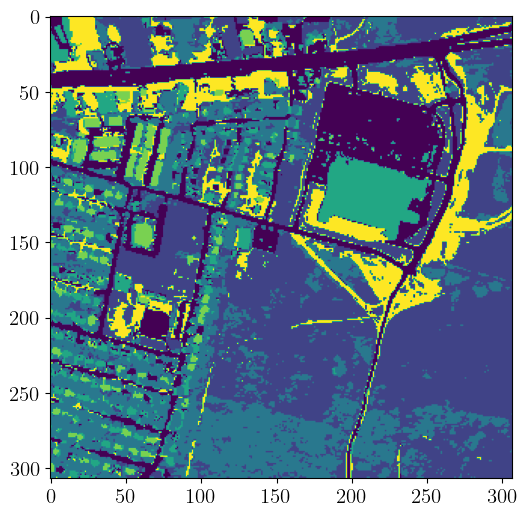

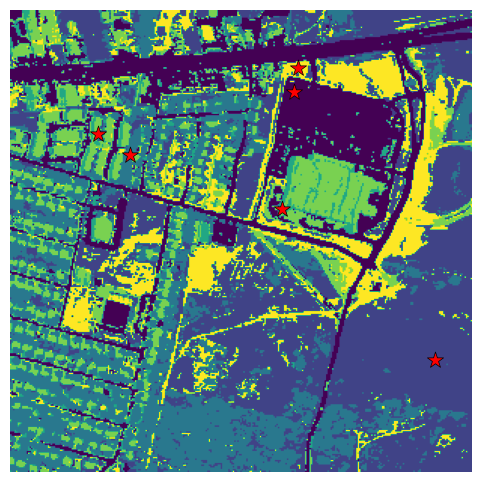

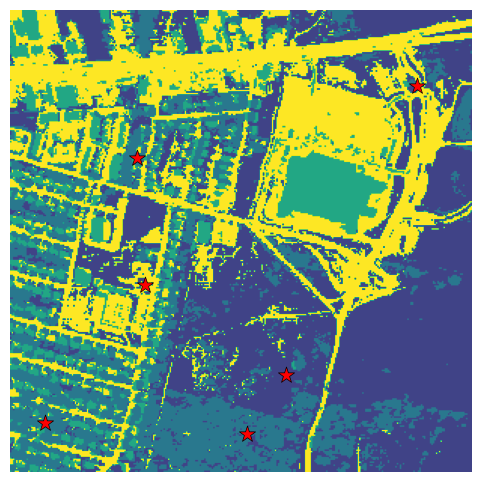

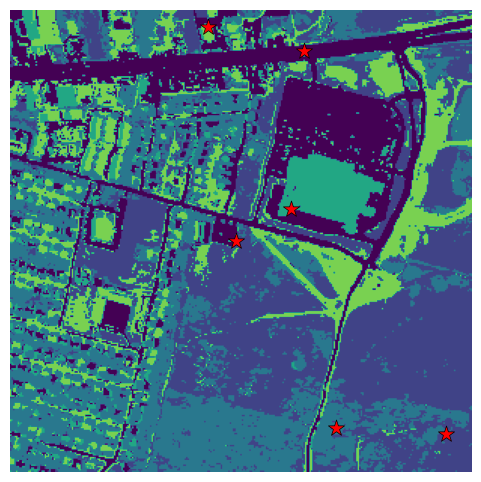

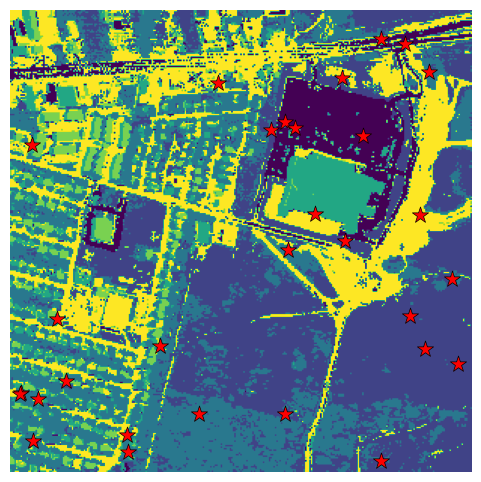

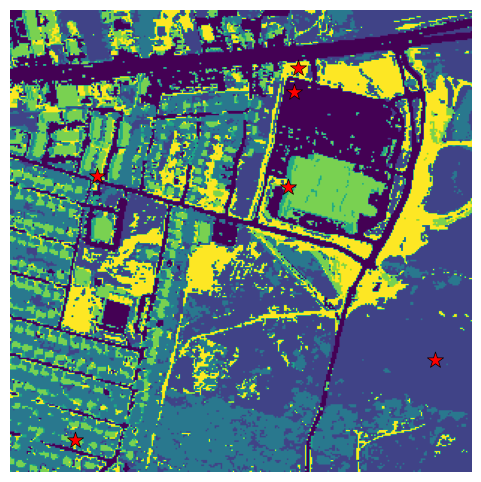

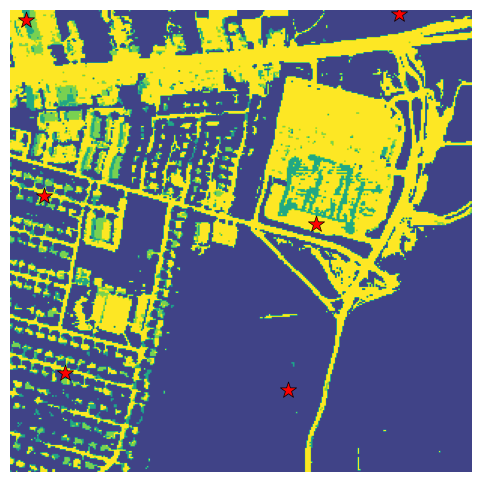

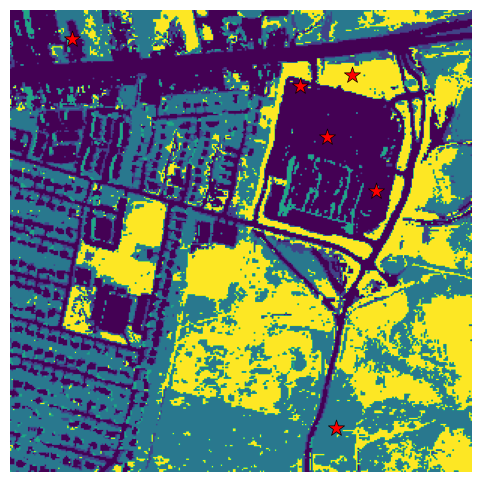

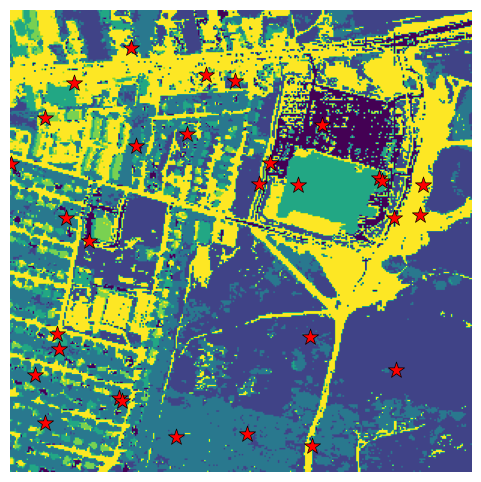

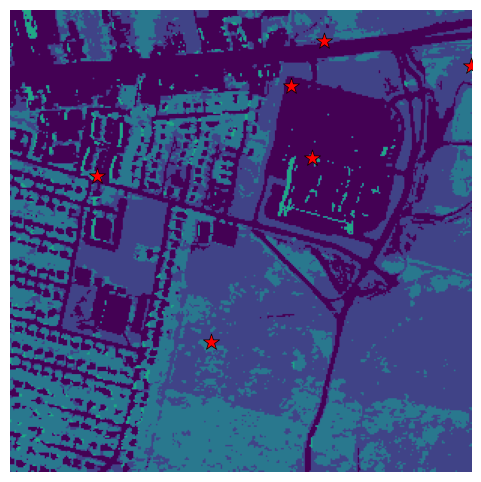

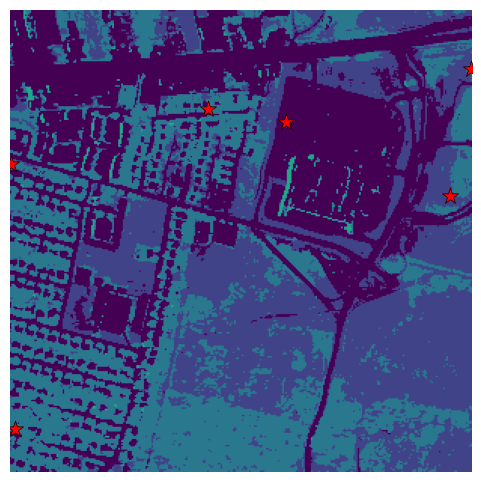

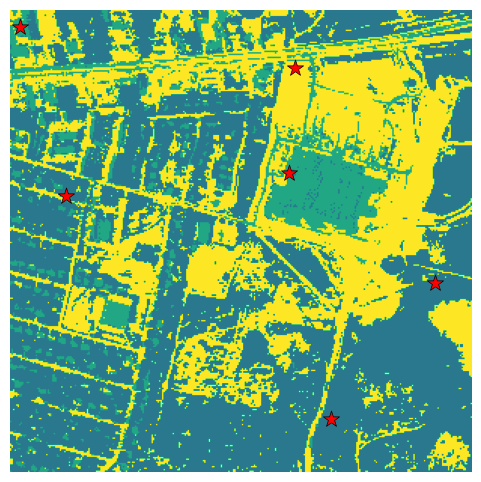

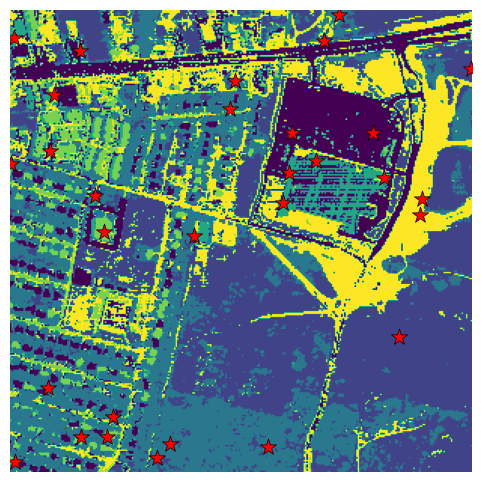

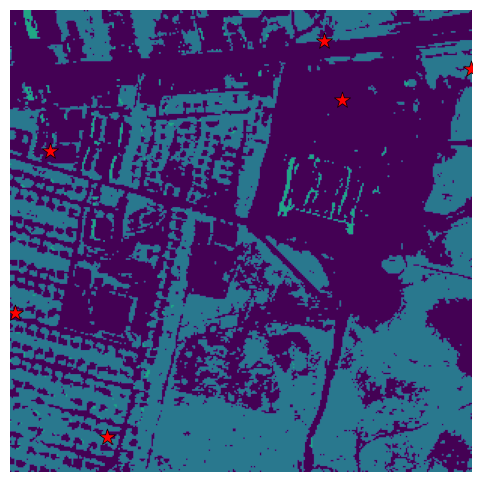

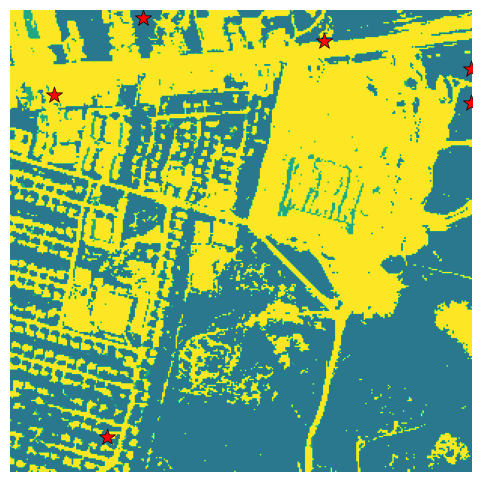

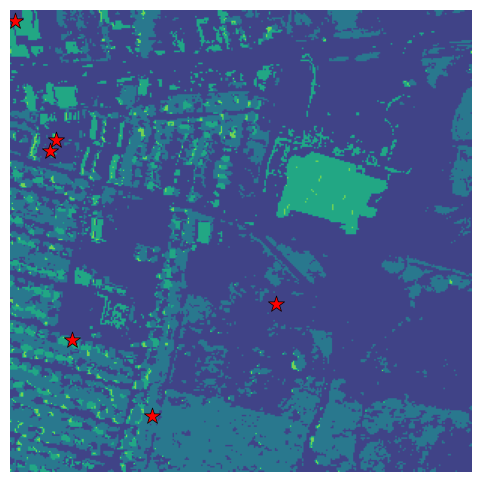

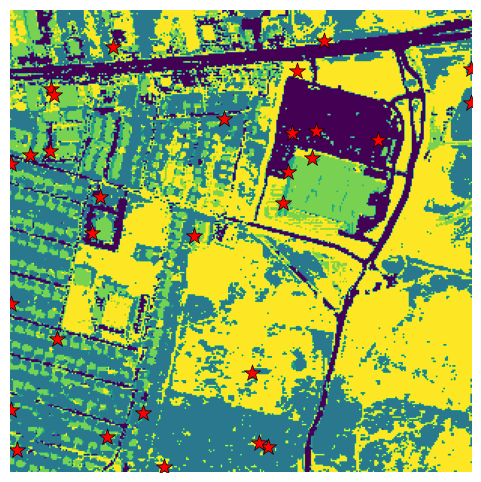

In [149]:
# predict on the full urban dataset
k = 6
save = True
labeled = True
methods_to_show = ['search_search', 'sampling_sampling', 'search', 'sampling']
resultsdir = "preds"

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img)
plt.show()
for p in [1,2,5,'inf']:
    for method in methods_to_show:
        # load the saved results 
        with np.load(f"./{resultsdir}/p{p}/{method}.npz", allow_pickle=True) as data:
            inds_in_full = data['inds_in_full']
            labels_in_full = data['labels_in_full']
            energy = data['energy'].item()
            dists = data['dists']
            H = data['H']
            
        closest_proto = H.argmax(axis=0)

        if labeled:
            closest_proto_ = np.zeros_like(closest_proto)
            for i, l in enumerate(labels_in_full):
                closest_proto_[closest_proto == i] = l
            closest_proto = closest_proto_
        else:
            if len(inds_in_full) > k:
                continue


        fig, ax = plt.subplots(figsize=(6,6))
        ax.imshow(closest_proto.reshape(307, 307).T, vmin=0, vmax=5, cmap='viridis')    
        for idx, l in zip(inds_in_full, labels_in_full):
            ax.scatter(idx // 307, idx % 307, c='r', s=150, marker='*', edgecolor='k', linewidth=.5)
            #ax.text(idx // 307, idx % 307, s=f"{l}", color='w', fontsize=15, ha='center', va='center')
        ax.axis('off')
        if not save:
            ax.set_title(f"{method}, {energy:.3f}", fontsize=22)
        else:
            plt.savefig(f"./figures/urban_full_{method}_p{p}_lab{1*labeled}.png", format="png", dpi=500, bbox_inches='tight')
        plt.show()


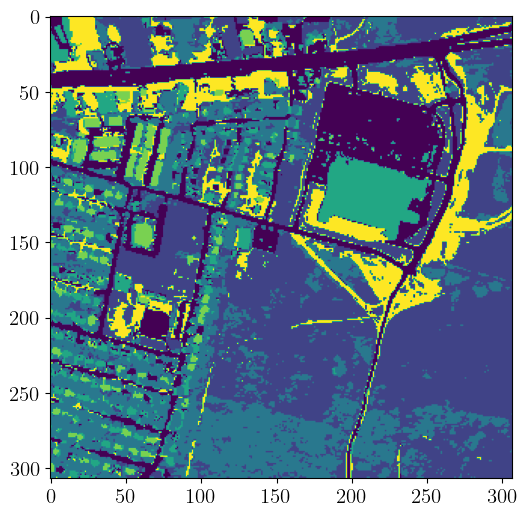

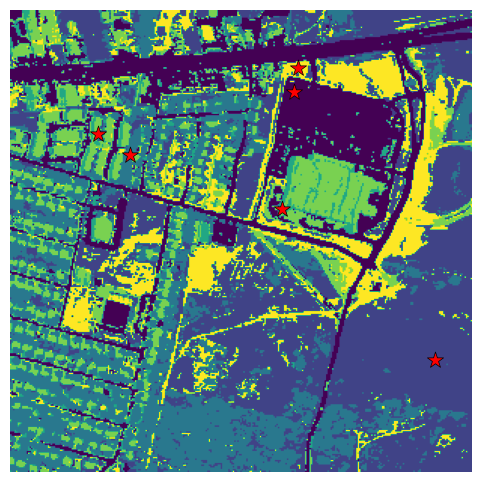

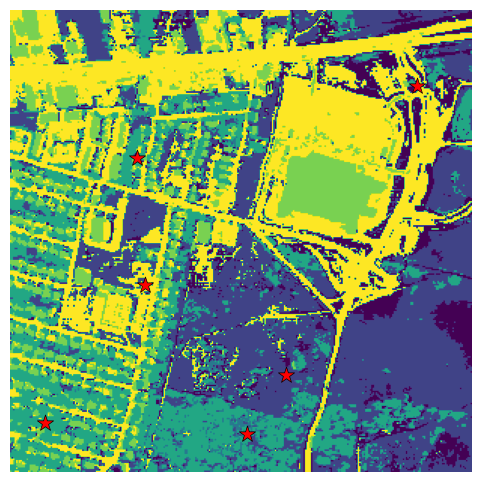

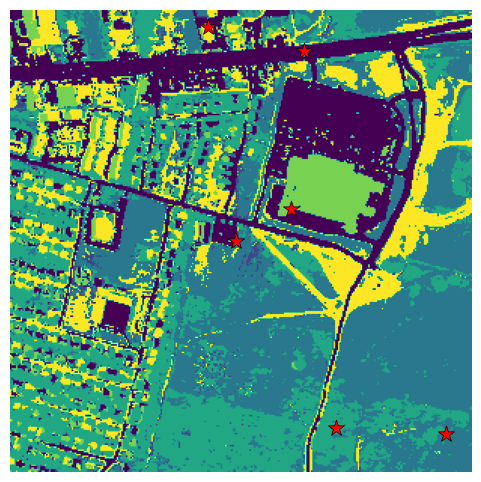

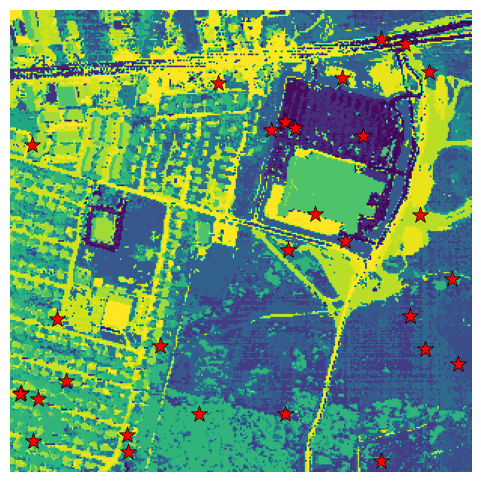

In [150]:
# predict on the full urban dataset
k = 6
save = True
labeled = False
methods_to_show = ['search_search', 'sampling_sampling', 'search', 'sampling']
resultsdir = "preds"

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img)
plt.show()
for p in [1]: #[1,2,5,'inf']:
    for method in methods_to_show:
        # load the saved results 
        with np.load(f"./{resultsdir}/p{p}/{method}.npz", allow_pickle=True) as data:
            inds_in_full = data['inds_in_full']
            labels_in_full = data['labels_in_full']
            energy = data['energy'].item()
            dists = data['dists']
            H = data['H']
            
        closest_proto = H.argmax(axis=0)

        if labeled:
            closest_proto_ = np.zeros_like(closest_proto)
            for i, l in enumerate(labels_in_full):
                closest_proto_[closest_proto == i] = l
            closest_proto = closest_proto_


        fig, ax = plt.subplots(figsize=(6,6))
        if labeled:
            ax.imshow(closest_proto.reshape(307, 307).T, vmin=0, vmax=5, cmap='viridis')    
        else:
            ax.imshow(closest_proto.reshape(307, 307).T, cmap='viridis')
        for idx, l in zip(inds_in_full, labels_in_full):
            ax.scatter(idx // 307, idx % 307, c='r', s=150, marker='*', edgecolor='k', linewidth=.5)
            #ax.text(idx // 307, idx % 307, s=f"{l}", color='w', fontsize=15, ha='center', va='center')
        ax.axis('off')
        if not save:
            ax.set_title(f"{method}, {energy:.3f}", fontsize=22)
        else:
            plt.savefig(f"./figures/urban_full_{method}_p{p}_lab{1*labeled}.png", format="png", dpi=500, bbox_inches='tight')
        plt.show()


# Clustering Results

results/iris_cluster-dense_k10_p1_ns10.pkl
uniform 25
sampling 25
search 3
sampling_sampling 3
search_search 3
1.4627442110776054


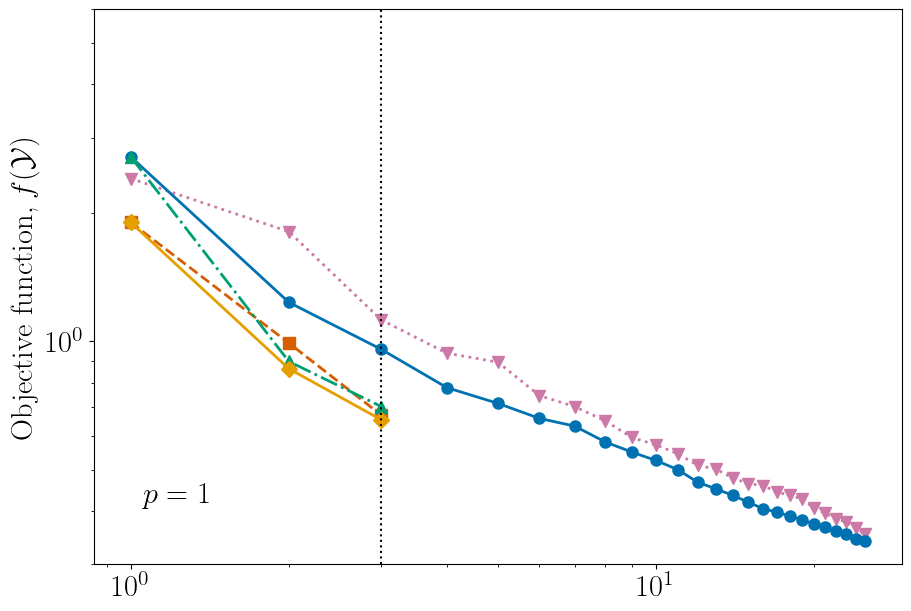

[np.float64(50.351305432009156), np.float64(51.75399921241373), np.float64(54.83858288737667), np.float64(49.3269816261686), np.float64(51.92038002576595), np.float64(47.24462929291846), np.float64(50.23263911655537), np.float64(48.8659561653586), np.float64(53.47291856449991), np.float64(50.88431142233374)]
10
results/iris_cluster-dense_k10_p2_ns10.pkl
uniform 25
sampling 25
search 3
sampling_sampling 3
search_search 3
1.3845341288657824


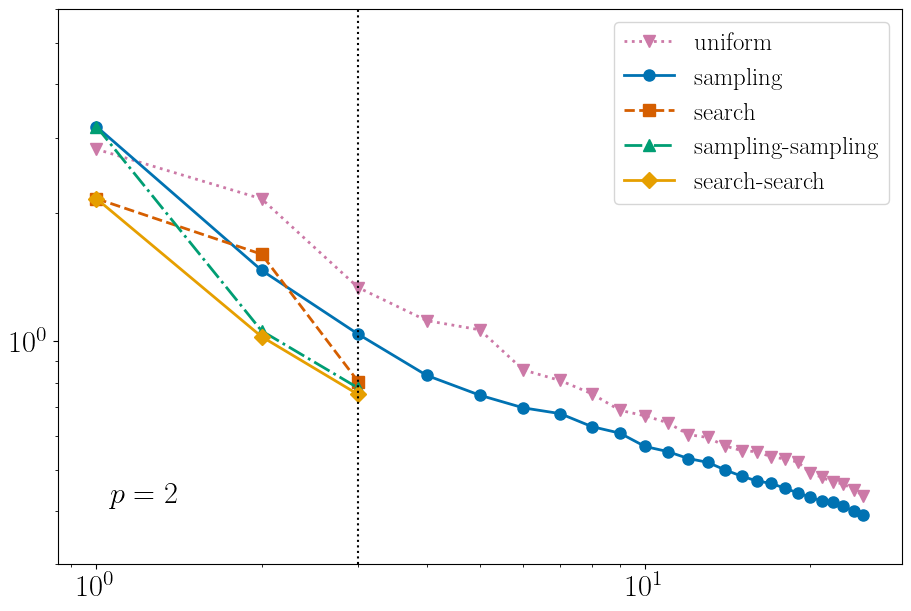

[np.float64(4.911211663123468), np.float64(4.817675788178388), np.float64(4.883646178829913), np.float64(4.9213819197457225), np.float64(4.751841748206671), np.float64(4.373785545725819), np.float64(4.803123983409149), np.float64(4.692547282660054), np.float64(5.081338406365043), np.float64(4.5694638635183376)]
10
results/iris_cluster-dense_k10_p5_ns10.pkl
uniform 25
sampling 25
search 3
sampling_sampling 3
search_search 3
1.274842565876621


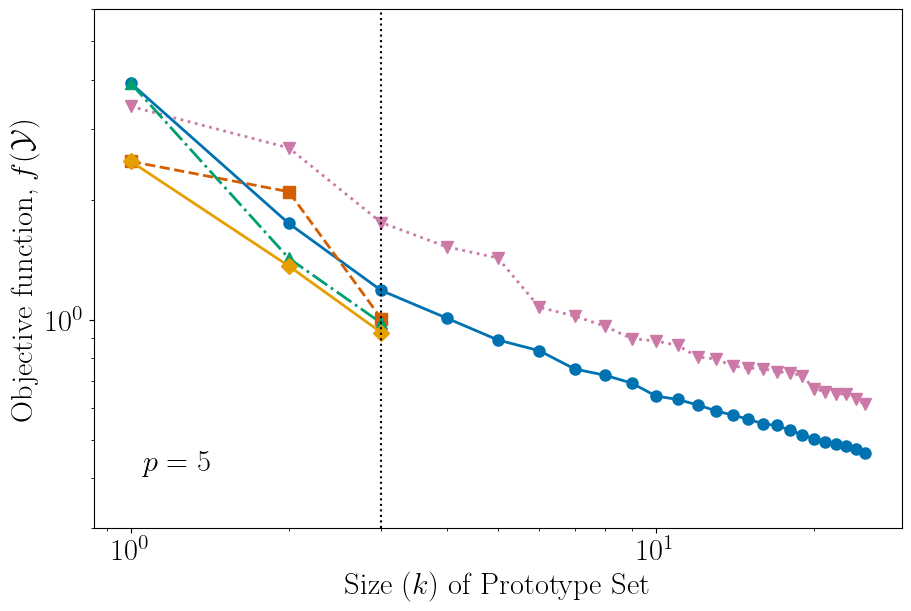

[np.float64(1.1443486532894953), np.float64(1.3652803078826097), np.float64(1.2061165176741453), np.float64(1.3103825064334034), np.float64(1.2848031981813608), np.float64(1.2644625613636724), np.float64(1.1948507619718642), np.float64(1.2071164075474394), np.float64(1.3195725091744044), np.float64(1.2987358244831777)]
10
results/iris_cluster-dense_k10_pinf_ns10.pkl
uniform 25
sampling 25
search 3
sampling_sampling 3
search_search 3
1.4700697755435042


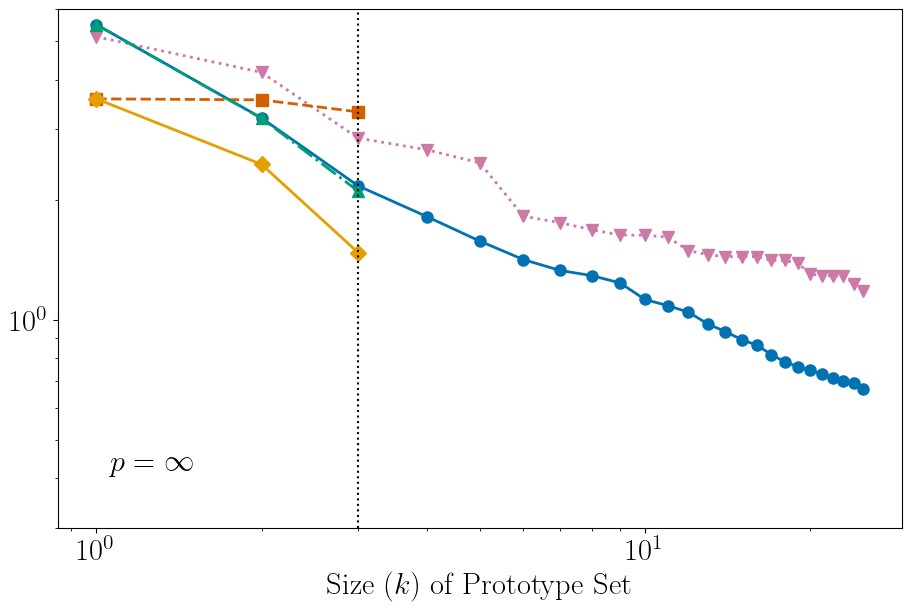

[np.float64(0.6557438524302053), np.float64(0.6557438524302053), np.float64(0.7141428428542985), np.float64(0.6855654600401062), np.float64(0.6480740698407764), np.float64(0.6855654600401243), np.float64(0.6480740698407929), np.float64(0.6557438524302053), np.float64(0.6557438524302053), np.float64(0.6855654600401088)]
10


In [6]:
save = True
datasetname = "Iris"
dataset_lower = 'iris'
energy = 'cluster-dense'
k = 10
for p in [1,2,5, 'inf']:
    filename = f"results/{dataset_lower}_{energy}_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)

    plot_energies(filename, methods_all, datasetname, save=save, k=3, k_os=25, vmin=0.3, vmax=6)
    print(data['sampling']['energy'])
    print(len(data['sampling_sampling']['energy'][0]))